In [71]:
import pandas as pd 
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
import requests




1 - OUVERTURE FICHIER COMMERCE

In [3]:

df_commerce = pd.read_csv('./Data/data.csv', sep =";")
print(df_commerce)


/tmp/ipykernel_292464/1583544222.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_commerce = pd.read_csv('./Data/data.csv', sep =";")


                X          Y            osm_id         type  \
0       55.519784 -21.276031  node/11721653361       beauty   
1        6.126323  45.898993   node/6851307099      tobacco   
2        4.854186  46.781140   node/2249047677        shoes   
3        4.575212  44.720957   node/2250990113   restaurant   
4        4.675546  45.246532   node/8081393066    insurance   
...           ...        ...               ...          ...   
659917   1.850903  48.908997   node/9400801794  hairdresser   
659918  -3.075557  47.573392   node/6023216120   restaurant   
659919  -1.719222  47.224660  node/11685829904       cheese   
659920   0.146254  47.972724      way/63576659      clothes   
659921   2.314900  48.882990  node/11880709231        shoes   

                                 name     brand operator wheelchair  \
0       Gentleman's Art's Hair Design       NaN      NaN        NaN   
1                           Le Narval       NaN      NaN        NaN   
2                            M

In [4]:

df_commerce.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659922 entries, 0 to 659921
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   X               659922 non-null  float64
 1   Y               659922 non-null  float64
 2   osm_id          659922 non-null  object 
 3   type            659922 non-null  object 
 4   name            607178 non-null  object 
 5   brand           142003 non-null  object 
 6   operator        55824 non-null   object 
 7   wheelchair      92597 non-null   object 
 8   opening_hours   224752 non-null  object 
 9   level           19681 non-null   object 
 10  siret           72571 non-null   object 
 11  profession_ref  47662 non-null   object 
 12  wikidata        126042 non-null  object 
 13  website         150193 non-null  object 
 14  phone           202168 non-null  object 
 15  email           29916 non-null   object 
 16  facebook        23690 non-null   object 
 17  address   

In [5]:
df_commerce.loc[10]

X                             1.447021
Y                            43.606641
osm_id                 node/2316954259
type                        restaurant
name                  Green sur mesure
brand                              NaN
operator                           NaN
wheelchair                         NaN
opening_hours        Mo-Su 11:00-22:00
level                              NaN
siret                   90014767900014
profession_ref                     NaN
wikidata                           NaN
website                            NaN
phone                              NaN
email                              NaN
facebook                           NaN
address           20 Place Victor Hugo
com_insee                        31555
com_nom                       Toulouse
last_update                 2024-10-29
Name: 10, dtype: object

In [6]:
df_commerce.columns


Index(['X', 'Y', 'osm_id', 'type', 'name', 'brand', 'operator', 'wheelchair',
       'opening_hours', 'level', 'siret', 'profession_ref', 'wikidata',
       'website', 'phone', 'email', 'facebook', 'address', 'com_insee',
       'com_nom', 'last_update'],
      dtype='object')

In [7]:

df_commerce_dropped = df_commerce.drop(['facebook', 'last_update'], axis=1, inplace=True)
df_commerce_dropped



2 - OUVERTURE FICHIER METADATA

In [8]:


df_metadata = pd.read_csv('./Data/metadata.csv', sep =";")
print(df_metadata)




  COLL_NOM COLL_SIRET                        ID  \
0   France         FR  osm-shop_craft_office-FR   

                                 TITRE  \
0  Commerces de France (OpenStreetMap)   

                                         DESCRIPTION  \
0  Commerces au sens large issus d'OpenStreetMap ...   

                       THEME PRODUCTEUR_NOM  PRODUCTEUR_SIRET  \
0  Entreprise et concurrence  OpenStreetMap               NaN   

  COUV_SPAT_MAILLE COUV_SPAT_NOM COUV_TEMP_DEBUT COUV_TEMP_FIN  DATE_PUBL  \
0   Infracommunale        France      2008-01-01    2024-12-01        NaN   

     FREQ_MAJ    DATE_MAJ                                         MOTS_CLES  \
0  Ponctuelle  2024-12-01  scdl;entreprise-et-concurrence;commerce;services   

                      LICENCE  NOMBRE_RESSOURCES FORMAT_RESSOURCES  \
0  Open Database License-ODBL                  1               csv   

                                                 URL  
0  https://geodatamine.fr/dump/shop_craft_office_...  


In [9]:
df_metadata.columns

Index(['COLL_NOM', 'COLL_SIRET', 'ID', 'TITRE', 'DESCRIPTION', 'THEME',
       'PRODUCTEUR_NOM', 'PRODUCTEUR_SIRET', 'COUV_SPAT_MAILLE',
       'COUV_SPAT_NOM', 'COUV_TEMP_DEBUT', 'COUV_TEMP_FIN', 'DATE_PUBL',
       'FREQ_MAJ', 'DATE_MAJ', 'MOTS_CLES', 'LICENCE', 'NOMBRE_RESSOURCES',
       'FORMAT_RESSOURCES', 'URL'],
      dtype='object')

In [72]:
df_metadata['LICENCE'].head(5)

0    Open Database License-ODBL
Name: LICENCE, dtype: object

In [73]:
df_metadata

,COLL_NOM,COLL_SIRET,ID,TITRE,DESCRIPTION,THEME,PRODUCTEUR_NOM,PRODUCTEUR_SIRET,COUV_SPAT_MAILLE,COUV_SPAT_NOM,COUV_TEMP_DEBUT,COUV_TEMP_FIN,DATE_PUBL,FREQ_MAJ,DATE_MAJ,MOTS_CLES,LICENCE,NOMBRE_RESSOURCES,FORMAT_RESSOURCES,URL
0,France,FR,osm-shop_craft_office-FR,Commerces de France (OpenStreetMap),Commerces au sens large issus d'OpenStreetMap ...,Entreprise et concurrence,OpenStreetMap,NaN,Infracommunale,France,2008-01-01,2024-12-01,NaN,Ponctuelle,2024-12-01,scdl;entreprise-et-concurrence;commerce;services,Open Database License-ODBL,1,csv,https://geodatamine.fr/dump/shop_craft_office_...


In [74]:

df_metadata_cropped = df_metadata.drop(['COUV_TEMP_DEBUT', 'COUV_TEMP_FIN', 'DATE_PUBL', 
                                      'FREQ_MAJ', 'DATE_MAJ', 'MOTS_CLES'], axis=1)
df_metadata_cropped


,COLL_NOM,COLL_SIRET,ID,TITRE,DESCRIPTION,THEME,PRODUCTEUR_NOM,PRODUCTEUR_SIRET,COUV_SPAT_MAILLE,COUV_SPAT_NOM,LICENCE,NOMBRE_RESSOURCES,FORMAT_RESSOURCES,URL
0,France,FR,osm-shop_craft_office-FR,Commerces de France (OpenStreetMap),Commerces au sens large issus d'OpenStreetMap ...,Entreprise et concurrence,OpenStreetMap,NaN,Infracommunale,France,Open Database License-ODBL,1,csv,https://geodatamine.fr/dump/shop_craft_office_...


3 - OUVERTURE FICHIER LICENCE



In [13]:
df_license = pd.read_csv('./Data/license.txt', sep =";")
print(df_license)

  Données © les contributeurs d’OpenStreetMap, sous licence Open Database License
0  La licence complète est disponible à cette adr...                             


In [14]:
df_lieu_equip_cult = pd.read_csv('./Data/base-des-lieux-et-des-equipements-culturels.csv', sep =";")
df_lieu_equip_cult

/tmp/ipykernel_292464/860819953.py:1: DtypeWarning: Columns (14,22,23,30,33,34,41,45,46) have mixed types. Specify dtype option on import or set low_memory=False.
  df_lieu_equip_cult = pd.read_csv('./Data/base-des-lieux-et-des-equipements-culturels.csv', sep =";")


,Source,Nom,Adresse,Complement Adresse,Code Postal,libelle_geographique,code_insee,Code Insee Arrondt,Identifiant origine,Type équipement ou lieu,...,Annee_Label_Appellation,Latitude,Longitude,Demographie_AP,Demographie_detail_entree,Démographie_detail_sortie,Multi_equipements,identifiant_QPV_24,identifiant_QPV_15,coordonnees_geo
0,Ministère de la Culture - Service du livre et ...,Médiathèque de COMMENSACQ,200 ROUTE DE TRENSACQ,NaN,40210.0,Commensacq,40085,402,LI14040,Bibliothèque,...,NaN,44.2106959785251,-0.822885,Actif,historiquement dans la base en 2020,NaN,NaN,NaN,NaN,"44.2106959785251, -0.822884754184157"
1,Ministère de la Culture - Service du livre et ...,Bibliothèque MUNICIPALE de CREON-D'ARMAGNAC,"12, Rue Raoul Follereau",NaN,40240.0,Créon-d'Armagnac,40087,402,LI7880,Bibliothèque,...,NaN,43.993868098598,-0.105588,Actif,historiquement dans la base en 2020,NaN,NaN,NaN,NaN,"43.993868098598, -0.105588386166206"
2,Ministère de la Culture - Service du livre et ...,Bibliothèque de GELOUX,2 PLACE DE LA MAIRIE,NaN,40090.0,Geloux,40111,402,LI7888,Bibliothèque,...,NaN,43.9810194468607,-0.638823,Actif,historiquement dans la base en 2020,NaN,NaN,NaN,NaN,"43.9810194468607, -0.638822931528512"
3,Ministère de la Culture - Service du livre et ...,Médiathèque CHALOSSE TURSAN HAGETMAU,4 PLACE GRAMONT,NaN,40700.0,Hagetmau,40119,402,LI1734,Bibliothèque,...,NaN,43.6573228675739,-0.593452,Actif,historiquement dans la base en 2020,NaN,NaN,NaN,NaN,"43.6573228675739, -0.593452338732522"
4,Ministère de la Culture - Service du livre et ...,Médiathèque de HINX,100 ROUTE DE DAX,NaN,40180.0,Hinx,40126,401,LI7894,Bibliothèque,...,NaN,43.701671909797,-0.927995,Actif,historiquement dans la base en 2020,NaN,NaN,NaN,NaN,"43.701671909797, -0.927995381193468"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73786,Centre national du cinéma et de l'image animée,Espace Jules Verne,rue Jean Meunier,NaN,42660.0,Saint-Genest-Malifaux,42224,423,CINEMA386792,Cinéma,...,NaN,45.339677,4.414193,Actif,historiquement dans la base en 2020 ; actif en...,NaN,NaN,NaN,NaN,"45.3396772108575, 4.41419329795429"
73787,Centre national du cinéma et de l'image animée,Eden 3,place De La Gare,NaN,44150.0,Ancenis-Saint-Géréon,44003,445,CINEMA17803,Cinéma,...,NaN,47.364116,-1.178442,Actif,historiquement dans la base en 2020 ; actif en...,NaN,NaN,NaN,NaN,"47.364116, -1.178442"
73788,Centre national du cinéma et de l'image animée,L Odeon,7 place De L Eglise,NaN,44290.0,Guémené-Penfao,44067,445,CINEMA187191,Cinéma,...,NaN,47.630072,-1.832224,Actif,historiquement dans la base en 2020 ; actif en...,NaN,NaN,NaN,NaN,"47.6300724547455, -1.8322240424309"
73789,Centre national du cinéma et de l'image animée,Cinema St Michel,place Du General Charette,NaN,44650.0,Legé,44081,442,CINEMA221971,Cinéma,...,NaN,46.884992,-1.598342,Actif,historiquement dans la base en 2020 ; actif en...,NaN,NaN,NaN,NaN,"46.8849920463362, -1.59834249755653"


4- OUVERTURE FICHIER EQUIPEMENT CULTUREL

In [15]:
df_lieu_equip_cult.iloc[:,10].unique()


array([nan, 'Centre d’art contemporain d’intérêt national',
       'Centre chorégraphique national',
       'Centre de développement chorégaphique national',
       'Centre dramatique national', 'Art et essai',
       'Architecture contemporaine remarquable',
       'Centre national des arts de la rue et de l’espace public',
       'Centre national de création musicale',
       "Fonds régional d'art contemporain", 'Jardin remarquable',
       'LIR - Librairie indépendante de référence',
       'LR - Librairie de référence', 'Maison des illustres',
       'Microfolie', 'Monument national', 'Musée national',
       'Monument historique', 'Musée de France', 'Opéra national',
       'Opéra national en région', 'Pôle national cirque',
       'Centre culturel de rencontre',
       'Scène conventionnée d’intérêt national', 'Scène nationale',
       'Scène de musiques actuelles', 'Théâtre hors label',
       'Théâtre national', 'Théâtre privé', 'Théâtre de ville',
       "Théatre lyrique d'int

5-OUVERTURE FICHIER POPULATION

In [16]:
df_population= pd.read_csv('./Data/datapopulation.csv', sep =";", header = 2)
df_population

,Code,Libellé,Population municipale 2021
0,01001,L'Abergement-Clémenciat,832
1,01002,L'Abergement-de-Varey,267
2,01004,Ambérieu-en-Bugey,14854
3,01005,Ambérieux-en-Dombes,1897
4,01006,Ambléon,113
...,...,...,...
34930,97613,M'Tsangamouji,N/A - résultat non disponible
34931,97614,Ouangani,N/A - résultat non disponible
34932,97615,Pamandzi,N/A - résultat non disponible
34933,97616,Sada,N/A - résultat non disponible


In [17]:
df_population.isna().sum()

Code                          0
Libellé                       0
Population municipale 2021    0
dtype: int64

In [18]:
df_population['Population municipale 2021'].value_counts()['N/A - résultat non disponible']

20

In [19]:
len(df_population['Population municipale 2021'])

34935

In [20]:
df_population['Population municipale 2021'] = df_population['Population municipale 2021'].map(lambda x : 0 if x == 'N/A - résultat non disponible' else x)

In [21]:
'N/A - résultat non disponible'

'N/A - résultat non disponible'

In [22]:
df_population

,Code,Libellé,Population municipale 2021
0,01001,L'Abergement-Clémenciat,832
1,01002,L'Abergement-de-Varey,267
2,01004,Ambérieu-en-Bugey,14854
3,01005,Ambérieux-en-Dombes,1897
4,01006,Ambléon,113
...,...,...,...
34930,97613,M'Tsangamouji,0
34931,97614,Ouangani,0
34932,97615,Pamandzi,0
34933,97616,Sada,0


In [23]:
df_population['Population municipale 2021']

0          832
1          267
2        14854
3         1897
4          113
         ...  
34930        0
34931        0
34932        0
34933        0
34934        0
Name: Population municipale 2021, Length: 34935, dtype: object

5/ CRÉE NOUVEAU DATAFRAME pour villes fdont population supérieur > 20 000 habitants et < 20 000 habitants

In [24]:
df_population

,Code,Libellé,Population municipale 2021
0,01001,L'Abergement-Clémenciat,832
1,01002,L'Abergement-de-Varey,267
2,01004,Ambérieu-en-Bugey,14854
3,01005,Ambérieux-en-Dombes,1897
4,01006,Ambléon,113
...,...,...,...
34930,97613,M'Tsangamouji,0
34931,97614,Ouangani,0
34932,97615,Pamandzi,0
34933,97616,Sada,0


In [25]:
df_population_integrer = df_population['Population municipale 2021'].astype(int)
df_population_integrer

0          832
1          267
2        14854
3         1897
4          113
         ...  
34930        0
34931        0
34932        0
34933        0
34934        0
Name: Population municipale 2021, Length: 34935, dtype: int64

In [26]:
df_grandes_villes = df_population_integrer[df_population_integrer > 20000]
df_grandes_villes

47        41525
239       22277
781       24021
1053      52958
1081      28705
          ...  
34908    105240
34909     84077
34911     34344
34913     24293
34915     81943
Name: Population municipale 2021, Length: 481, dtype: int64

In [27]:
df_grandes_villes = df_population_integrer[df_population_integrer < 20000]
df_grandes_villes


0          832
1          267
2        14854
3         1897
4          113
         ...  
34930        0
34931        0
34932        0
34933        0
34934        0
Name: Population municipale 2021, Length: 34454, dtype: int64

In [28]:
df_petites_villes = [df_population_integrer < 20000]
type(df_petites_villes)

list

Recupérer les code postaux

In [ ]:

df_geopoints = pd.read_csv('./Data/cities.csv', sep =",")
print(df_geopoints)

      insee_code            city_code  zip_code                label  \
0          25620        ville du pont     25650        ville du pont   
1          25624       villers grelot     25640       villers grelot   
2          25615  villars les blamont     25310  villars les blamont   
3          25619        les villedieu     25240        les villedieu   
4          25622        villers buzon     25170        villers buzon   
...          ...                  ...       ...                  ...   
39140      98829                 thio     98829                 thio   
39141      98831                  voh     98833                  voh   
39142      98832                 yate     98834                 yate   
39143      98612               sigave     98620               sigave   
39144      98613                 uvea     98600                 uvea   

        latitude   longitude     department_name department_number  \
0      46.999873    6.498147               doubs                2

In [ ]:
df_geopoints.rename(columns={'zip_code': 'Code'}, inplace=True)


Création de la nouvelle dataframe concaténée

In [ ]:
concatenated_dataframe = pd.concat([df_geopoints, df_population], axis=1) 
concatenated_dataframe


In [90]:
concatenated_dataframe['zip'] = list(zip(concatenated_dataframe['latitude'], concatenated_dataframe['longitude']))

concatenated_dataframe['zip'] 

#print(concatenated_dataframe[['latitude', 'longitude', 'zip']].head())


In [ ]:
df = geopandas.GeoDataFrame(concatenated_zip, geometry='concatenated_zip')

NameError: name 'geopandas' is not defined

In [ ]:
concatenated_dataframe['zip'] .isna().sum()

0

In [ ]:
concatenated_dataframe.dropna(inplace=True)
concatenated_dataframe

,insee_code,city_code,Code,label,latitude,longitude,department_name,department_number,region_name,region_geojson_name,Code,Libellé,Population municipale 2021,zip
0,25620,ville du pont,25650,ville du pont,46.999873,6.498147,doubs,25,bourgogne-franche-comté,Bourgogne-Franche-Comté,01001,L'Abergement-Clémenciat,832,"(46.999873398, 6.498147193)"
1,25624,villers grelot,25640,villers grelot,47.361512,6.235167,doubs,25,bourgogne-franche-comté,Bourgogne-Franche-Comté,01002,L'Abergement-de-Varey,267,"(47.361512085, 6.235167025)"
2,25615,villars les blamont,25310,villars les blamont,47.368384,6.871415,doubs,25,bourgogne-franche-comté,Bourgogne-Franche-Comté,01004,Ambérieu-en-Bugey,14854,"(47.368383721, 6.871414913)"
3,25619,les villedieu,25240,les villedieu,46.713906,6.265831,doubs,25,bourgogne-franche-comté,Bourgogne-Franche-Comté,01005,Ambérieux-en-Dombes,1897,"(46.713906258, 6.26583065)"
4,25622,villers buzon,25170,villers buzon,47.228558,5.852187,doubs,25,bourgogne-franche-comté,Bourgogne-Franche-Comté,01006,Ambléon,113,"(47.228558434, 5.852186748)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34930,80570,moreuil,80110,moreuil,49.776139,2.484102,somme,80,hauts-de-france,Hauts-de-France,97613,M'Tsangamouji,0,"(49.776139288, 2.484101678)"
34931,80573,morvillers st saturnin,80290,morvillers st saturnin,49.778731,1.815822,somme,80,hauts-de-france,Hauts-de-France,97614,Ouangani,0,"(49.778731195, 1.815822336)"
34932,80587,neslette,80140,neslette,49.927364,1.665057,somme,80,hauts-de-france,Hauts-de-France,97615,Pamandzi,0,"(49.927364114, 1.665057388)"
34933,80595,la neuville sire bernard,80110,la neuville sire bernard,49.743036,2.522593,somme,80,hauts-de-france,Hauts-de-France,97616,Sada,0,"(49.743035523, 2.52259271)"


In [ ]:
concatenated_dataframe['zip'] .to_file('MyGeometries.shp', driver='ESRI Shapefile')

AttributeError: 'Series' object has no attribute 'to_file'

<Axes: xlabel='Population municipale 2021'>

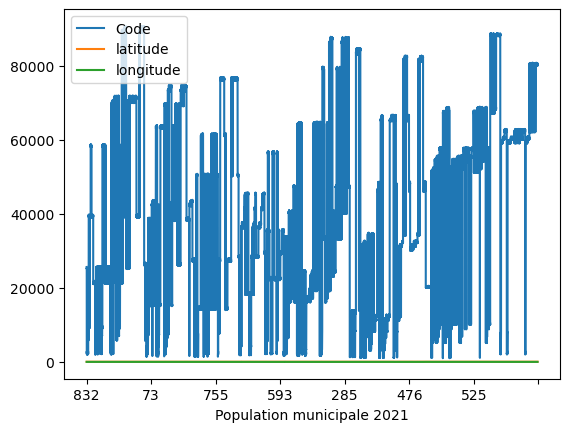

In [ ]:
concatenated_dataframe.plot('Population municipale 2021')

In [ ]:
france = concatenated_dataframe[concatenated_dataframe['region_name'] == 'Bourgogne-Franche-Comté']

<Axes: >

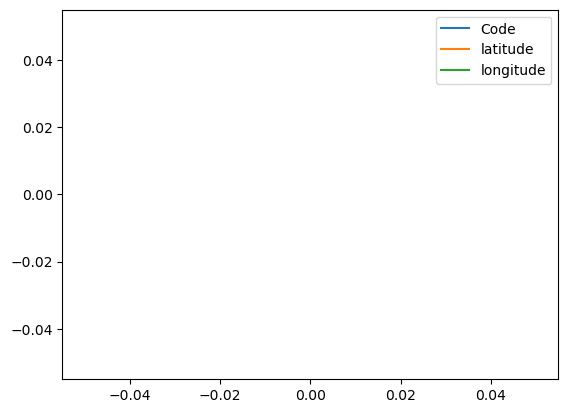

In [ ]:
france.plot()


sc = ax.scatter(
    concatenated_dataframe['longitude'],  # Longitude (axe X)
    concatenated_dataframe['latitude'],  # Latitude (axe Y)
    s=concatenated_dataframe['Population municipale 2021'] / 100,  # Taille proportionnelle à la population
    c=concatenated_dataframe['Population municipale 2021'],  # Couleur basée sur la population
    cmap='viridis',  # Colormap
    alpha=0.7,  # Transparence
    edgecolor='black'

Création Map avec Folium

In [ ]:
from numpy import random  # listes de nombres aléatoires
import matplotlib.pyplot as plt  # graphiques
import geopandas as gpd  # gestion de données carto
from pandas import concat  # concaténer les DataFrames.

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
pd.options.display.max_rows = 10


import geopandas as gpd
from shapely.geometry import Point
from geopandas import GeoDataFrame
import folium


In [ ]:
m = folium.Map(location=[46.603354, 1.888334], zoom_start=6)



In [ ]:
coordinates = concatenated_dataframe(concatenated_dataframe[list(zip(concatenated_dataframe['latitude'], concatenated_dataframe['longitude']))]
coordinates


SyntaxError: '(' was never closed (3222059398.py, line 1)

In [ ]:
for _, row in concatenated_dataframe.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"{row['Code']} - Population Population municipale 2021: {row['Population municipale 2021']}",
        tooltip=row['Population municipale 2021']
    ).add_to(m)


In [ ]:
m.save("map.html")